In [33]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error, roc_auc_score, roc_curve
%matplotlib inline

In [3]:
data_path = os.path.join(os.getcwd(), 'data', 'classification_eval_1.csv')
data = pd.read_csv(data_path, delimiter = ',')

In [7]:
data.head(5)

,gt,alg_1,alg_2,alg_3,alg_4
0,0,0.051302,0.000000,0.821882,0.705028
1,0,0.695441,1.000000,1.000000,0.741789
2,1,0.471121,0.913034,0.000000,1.000000
3,1,1.000000,1.000000,0.000000,1.000000
4,0,0.857339,0.000000,0.296797,0.809736


In [10]:
y = data['gt']
X = data.drop(['gt'], axis=1)

In [18]:
X[X >= 0.5] = 1
X[X < 0.5] = 0

In [23]:
score1 = accuracy_score(X['alg_1'], y) * 100
score2 = accuracy_score(y, X['alg_2']) * 100
score3 = accuracy_score(y, X['alg_3']) * 100
score4 = accuracy_score(y, X['alg_4']) * 100
print(score1, score2, score3, score4)

61.6 55.00000000000001 32.1 32.9


In [29]:
roc1 = roc_auc_score(y, X['alg_1'])
roc2 = roc_auc_score(y,X['alg_2'])
roc3 = roc_auc_score(y, X['alg_3'])
roc4 = roc_auc_score(y, X['alg_4'])
print(roc1, roc2, roc3, roc4)

0.6799052085659694 0.599729521824363 0.20112781954887216 0.5795739348370927


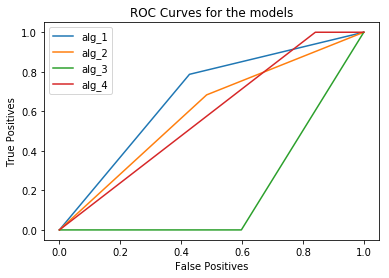

In [44]:
tp_1, fp_1, t_1 = roc_curve(y, X['alg_1'])
tp_2, fp_2, t_2 = roc_curve(y, X['alg_2'])
tp_3, fp_3, t_3 = roc_curve(y, X['alg_3'])
tp_4, fp_4, t_4 = roc_curve(y, X['alg_4'])
fig, ax = plt.subplots()
ax.plot(tp_1, fp_1, label="alg_1")
ax.plot(tp_2, fp_2, label="alg_2")
ax.plot(tp_3, fp_3, label="alg_3")
ax.plot(tp_4, fp_4, label="alg_4")
ax.set_xlabel("False Positives")
ax.set_ylabel("True Positives")
ax.set_title("ROC Curves for the models")
plt.legend()
plt.savefig("roc.png")
plt.show()